# emcee document
https://emcee.readthedocs.io/

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Example: Fitting a Model to Data
https://emcee.readthedocs.io/en/v2.2.1/user/line/

In [12]:
# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0.1+0.5*np.random.rand(N)
y = m_true*x+b_true
y += np.abs(f_true*y) * np.random.randn(N)
y += yerr * np.random.randn(N)

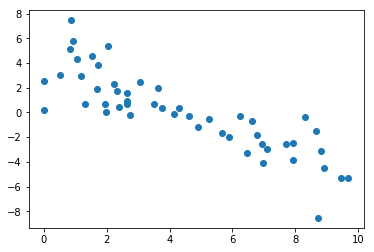

In [8]:
plt.scatter(x,y)
plt.show()

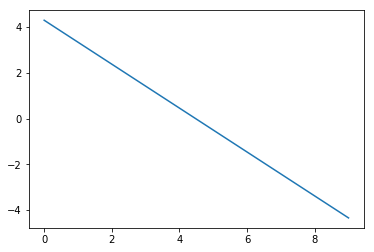

In [7]:
x_truemodel = np.array(range(10))
y_truemodel = m_true*x_truemodel+b_true
plt.plot(x_truemodel,y_truemodel)
plt.show()

In [13]:
A = np.vstack((np.ones_like(x), x)).T
C = np.diag(yerr * yerr)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))


In [14]:
print('b_ls=%f, m_ls=%f' % (b_ls, m_ls))

b_ls=4.593464, m_ls=-1.021153


In [15]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

In [16]:
import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args=(x, y, yerr))
m_ml, b_ml, lnf_ml = result["x"]

In [21]:
print('m_ml=%f, b_ml=%f, f_ml=%f' % (m_ml, b_ml, np.exp(lnf_ml)))

m_ml=-1.014280, b_ml=4.457589, f_ml=0.458369


In [22]:
def lnprior(theta):
    m, b, lnf = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < lnf < 1.0:
        return 0.0
    return -np.inf

In [23]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [24]:
ndim, nwalkers = 3, 100
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [25]:
import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))

In [26]:
sampler.run_mcmc(pos, 500)

(array([[-0.99964285,  4.25414351, -0.88972315],
        [-0.90771335,  4.07002491, -0.62943529],
        [-1.06011728,  4.56315466, -0.95691498],
        [-1.04112196,  4.58564533, -0.87725473],
        [-1.08606692,  4.84774301, -0.82820372],
        [-1.04350996,  4.52532887, -0.88642987],
        [-1.06957179,  4.6791233 , -0.88556065],
        [-0.88276304,  3.90110967, -0.66587732],
        [-1.13052449,  4.9584009 , -0.85544846],
        [-1.03868899,  4.48116732, -0.82696872],
        [-1.02075274,  4.49427822, -0.80011378],
        [-0.994087  ,  4.33240712, -0.75892255],
        [-1.01690709,  4.52362564, -0.86145722],
        [-1.26094465,  5.67681651, -0.68136907],
        [-1.00918554,  4.50384045, -0.74176648],
        [-0.89984589,  4.01248966, -0.51118731],
        [-1.08549359,  4.851538  , -0.81371523],
        [-1.06962675,  4.74955665, -0.82644362],
        [-1.00788597,  4.37193341, -0.94327735],
        [-1.00320801,  4.35374667, -0.535996  ],
        [-0.99609246

In [27]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

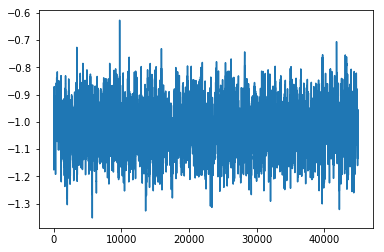

In [37]:
plt.plot(samples[:,0])
plt.show()

In [46]:
import corner
fig = corner.corner(samples, labels=["$m$", "$b$", "$\ln\,f$"],
                      truths=[m_true, b_true, np.log(f_true)])
fig.savefig("../output/triangle.png")

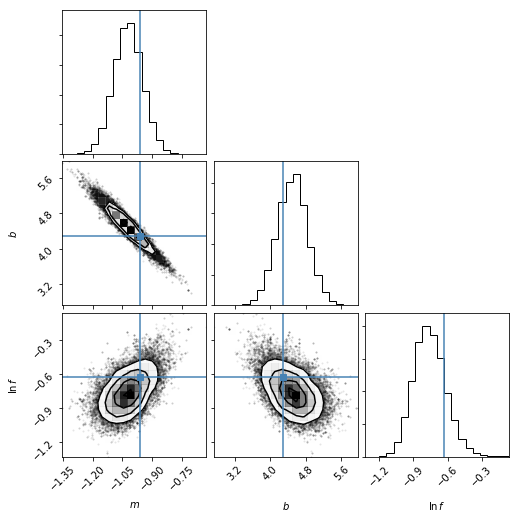

In [47]:
plt.show()

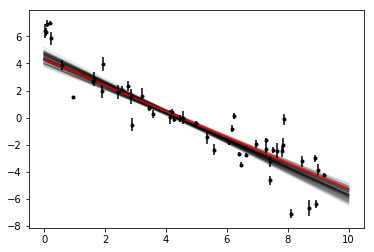

In [48]:
xl = np.array([0, 10])
for m, b, lnf in samples[np.random.randint(len(samples), size=100)]:
    plt.plot(xl, m*xl+b, color="k", alpha=0.1)
plt.plot(xl, m_true*xl+b_true, color="r", lw=2, alpha=0.8)
plt.errorbar(x, y, yerr=yerr, fmt=".k")
plt.show()